<a href="https://colab.research.google.com/github/rubenpadilla-oss/Portafolio/blob/main/examencdde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uso de la api del banco mundial

La versión 1.0.12 del  paquete wbgapi de Python  ya está disponible. Este paquete lleva casi un año en el  Índice de Paquetes de Python  y la última versión incorpora varias funciones nuevas para que la exploración y la búsqueda en bases de datos sean más sencillas e interactivas.

Los paquetes de Python para datos del Banco Mundial existen desde hace tiempo, pero WBGAPI es relativamente nuevo. Creé este paquete para aprovechar algunas mejoras de la API que también existen desde hace tiempo, pero que eran difíciles de entender o usar, y no contaban con el soporte de otros paquetes. También quería mejorar  la compatibilidad con Pandas  y, en general, facilitar la recuperación de datos sin necesidad de código adicional.

El  archivo README  ofrece una descripción general y el propio paquete proporciona documentación extensa mediante la función de ayuda de Python. Para empezar, aquí tiene un breve resumen de cinco características que hacen que WBGAPI sea único.

In [1]:
#Funcion de importacion de datos del Banco mundial
%pip install wbgapi

In [2]:
import wbgapi as wb
from datetime import datetime
from google.colab import files, drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/examen cdde')

import my_func as fn
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [4]:
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=15)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS']
Descargando bloque 2: ['SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 3: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS']
Descargando bloque 4: ['EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE.AR5', 'SE.PRM.NENR', '

## Análisis exploratori de datos

In [5]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,5.624918e+10,49.843240,6232464.0,1.677096,16340822.0,8559888.0,52.383460,7780934.0,...,NaN,NaN,65.013,62.775,60.226,NaN,NaN,NaN,NaN,38.4266
1,ZMB,Zambia,7.612916e+10,46.170619,7147630.0,2.794068,20723965.0,10467717.0,50.510204,10256248.0,...,NaN,NaN,68.673,66.349,63.936,NaN,NaN,NaN,NaN,33.0000
3,PSE,West Bank and Gaza,2.769440e+10,NaN,NaN,2.393265,5165775.0,2598445.0,50.301172,2567330.0,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
5,VNM,Viet Nam,1.359364e+12,48.623244,56799003.0,0.671429,100352192.0,51201223.0,51.021529,49150969.0,...,36.077468,29.637136,79.264,74.588,69.877,NaN,NaN,75.8894,80.3200,78.0800
7,VUT,Vanuatu,9.991622e+08,46.126995,115453.0,2.324816,320409.0,158611.0,49.502667,161798.0,...,NaN,NaN,73.927,71.477,69.445,NaN,NaN,NaN,NaN,45.7313


In [6]:
df_wb_raw.tail()

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
261,CEB,Central Europe and the Baltics,4.224592e+12,45.669942,49096984.0,0.103859,100175859.0,51635336.0,51.544691,48540523.0,...,80.939987,56.712559,81.624679,77.896784,74.354344,NaN,NaN,NaN,NaN,NaN
262,CSS,Caribbean small states,1.333323e+11,43.965332,1919128.0,0.501131,4519904.0,2293907.0,50.751230,2225997.0,...,NaN,NaN,76.456921,73.171645,69.986624,NaN,NaN,NaN,NaN,NaN
263,ARB,Arab World,8.076341e+12,19.141318,132483437.0,2.255866,482105978.0,232702770.0,48.267971,249403208.0,...,34.757931,31.807100,74.418910,72.444678,70.619437,NaN,NaN,NaN,NaN,NaN
264,AFW,Africa Western and Central,2.482181e+12,46.355771,212022202.0,2.386204,509398589.0,252899429.0,49.646669,256499160.0,...,NaN,NaN,59.997102,58.855722,57.752356,NaN,NaN,NaN,NaN,38.1
265,AFE,Africa Eastern and Southern,2.963096e+12,47.278110,288482369.0,2.520818,750503764.0,379025748.0,50.502844,371478016.0,...,NaN,NaN,67.914779,65.146291,62.395547,NaN,NaN,NaN,NaN,32.4


##Al revisar los primeros y ultimos registros se observa que la extraccion de datos contiene datos de paises y agrupaciones economicas. por lo tanto se procede a limpiar datos

In [7]:
import pandas as pd

In [8]:
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [9]:
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [10]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,5.624918e+10,49.843240,6232464.0,1.677096,16340822.0,8559888.0,52.383460,7780934.0,...,NaN,NaN,65.013,62.775,60.226,NaN,NaN,NaN,NaN,38.4266
1,ZMB,Zambia,7.612916e+10,46.170619,7147630.0,2.794068,20723965.0,10467717.0,50.510204,10256248.0,...,NaN,NaN,68.673,66.349,63.936,NaN,NaN,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,2.769440e+10,NaN,NaN,2.393265,5165775.0,2598445.0,50.301172,2567330.0,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,1.359364e+12,48.623244,56799003.0,0.671429,100352192.0,51201223.0,51.021529,49150969.0,...,36.077468,29.637136,79.264,74.588,69.877,NaN,NaN,75.8894,80.3200,78.0800
4,VUT,Vanuatu,9.991622e+08,46.126995,115453.0,2.324816,320409.0,158611.0,49.502667,161798.0,...,NaN,NaN,73.927,71.477,69.445,NaN,NaN,NaN,NaN,45.7313


In [11]:
df_wb_raw.tail()

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
192,AGO,Angola,2.664516e+11,49.450638,15430003.0,3.080655,36749906.0,18568216.0,50.525887,18181690.0,...,9.933616,10.165600,67.144,64.617,62.099,NaN,NaN,NaN,NaN,44.7581
193,AND,Andorra,5.225828e+09,NaN,NaN,1.433748,80856.0,39502.0,48.854754,41354.0,...,68.003820,57.193764,86.107,84.041,82.100,NaN,NaN,NaN,NaN,95.4456
194,DZA,Algeria,6.998184e+11,16.830056,13174228.0,1.498976,46164219.0,22614984.0,48.988123,23549235.0,...,67.258843,44.258295,77.696,76.261,74.895,NaN,NaN,NaN,NaN,76.9081
195,ALB,Albania,4.940567e+10,44.994454,1376643.0,-1.148418,2745972.0,1388342.0,50.559226,1357630.0,...,77.031527,52.749937,81.446,79.602,77.728,NaN,NaN,81.7239,84.59,83.1356
196,AFG,Afghanistan,8.223848e+10,6.846247,8866507.0,2.135594,41454761.0,20530683.0,49.525513,20924078.0,...,NaN,NaN,67.536,66.035,64.467,NaN,NaN,NaN,NaN,17.7089


##Una vez seleccionado los paises procederemos al analisis exploratorio

In [12]:
df_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  197 non-null    object 
 1   Country                  197 non-null    object 
 2   NY.GDP.MKTP.PP.KD        197 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              197 non-null    float64
 6   SP.POP.TOTL              197 non-null    float64
 7   SP.POP.TOTL.FE.IN        197 non-null    float64
 8   SP.POP.TOTL.FE.ZS        197 non-null    float64
 9   SP.POP.TOTL.MA.IN        197 non-null    float64
 10  SP.POP.TOTL.MA.ZS        197 non-null    float64
 11  SP.RUR.TOTL              196 non-null    float64
 12  SP.RUR.TOTL.ZG           188 non-null    float64
 13  SP.RUR.TOTL.ZS           196 non-null    float64
 14  SP.URB.GROW              1

<Axes: >

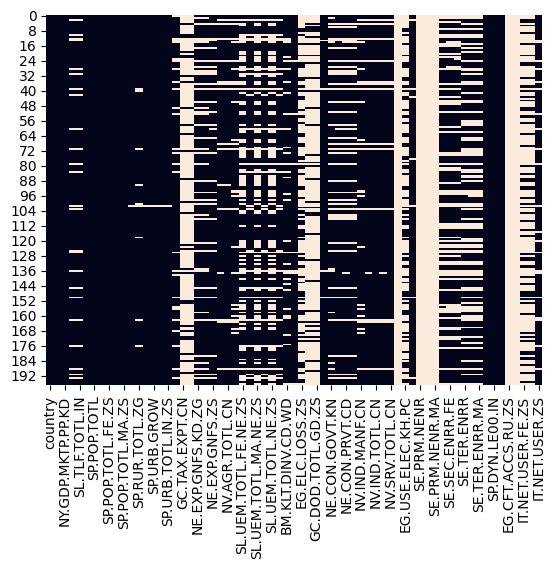

In [13]:
sns.heatmap(df_wb_raw.isnull(), cbar=False)

Existen variables con un alto volumen de datos faltantes. usaremos la siguiente regla para el tratamiento de los mismos


*   si "NaN" > 15% Se procede a eliminar la variable
*   si "NaN" > 15% Se procede a imputar datos



In [14]:
mask_bool = df_wb_raw.isna().mean()>0.15

drop_colums = list(df_wb_raw.isna().mean()[mask_bool].index)

df_wb_limpio = df_wb_raw.drop(columns=drop_colums)

In [15]:
df_wb_raw.isna().mean()

,0
country,0.000000
Country,0.000000
NY.GDP.MKTP.PP.KD,0.000000
SL.TLF.TOTL.FE.ZS,0.121827
SL.TLF.TOTL.IN,0.121827
...,...
EG.CFT.ACCS.RU.ZS,1.000000
EG.CFT.ACCS.UR.ZS,1.000000
IT.NET.USER.FE.ZS,0.710660
IT.NET.USER.MA.ZS,0.710660


A continuacion revisaremos la cantidad de datos de nuestro dataframe

In [16]:
print(f"El dataframe contiene {df_wb_limpio.shape[0]} filas y {df_wb_limpio.shape[1]} columnas de las cuales {len(df_wb_limpio.isna().sum()[df_wb_limpio.isna().mean()>0].index)} coninene datos nulos bajo el 15%")


El dataframe contiene 197 filas y 36 columnas de las cuales 24 coninene datos nulos bajo el 15%


In [17]:
df_wb_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  197 non-null    object 
 1   Country                  197 non-null    object 
 2   NY.GDP.MKTP.PP.KD        197 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              197 non-null    float64
 6   SP.POP.TOTL              197 non-null    float64
 7   SP.POP.TOTL.FE.IN        197 non-null    float64
 8   SP.POP.TOTL.FE.ZS        197 non-null    float64
 9   SP.POP.TOTL.MA.IN        197 non-null    float64
 10  SP.POP.TOTL.MA.ZS        197 non-null    float64
 11  SP.RUR.TOTL              196 non-null    float64
 12  SP.RUR.TOTL.ZG           188 non-null    float64
 13  SP.RUR.TOTL.ZS           196 non-null    float64
 14  SP.URB.GROW              1

In [18]:
df_wb_limpio.index = df_wb_limpio['Country']

In [19]:
df_wb_limpio = df_wb_limpio.drop(columns = ["country","Country"])

In [20]:
df_wb_limpio.head()

,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,...,NV.IND.MANF.CN,NV.IND.TOTL.CD,NV.IND.TOTL.CN,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,IT.NET.USER.ZS
Country,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,5.624918e+10,49.843240,6232464.0,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,11027277.0,...,8.791192e+09,9.266224e+09,1.407335e+10,2.198816e+10,3.339515e+10,0.7563,65.013,62.775,60.226,38.4266
Zambia,7.612916e+10,46.170619,7147630.0,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,11121516.0,...,4.739602e+10,9.682008e+09,1.956929e+11,1.566890e+10,3.167001e+11,1.4575,68.673,66.349,63.936,33.0000
West Bank and Gaza,2.769440e+10,NaN,NaN,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,1158063.0,...,NaN,NaN,NaN,NaN,NaN,NaN,71.502,65.170,59.691,86.6377
Viet Nam,1.359364e+12,48.623244,56799003.0,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,60733147.0,...,2.495417e+15,1.630505e+11,3.878535e+15,1.834968e+11,4.364896e+15,49.3190,79.264,74.588,69.877,78.0800
Vanuatu,9.991622e+08,46.126995,115453.0,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,237180.0,...,NaN,NaN,NaN,NaN,NaN,0.0010,73.927,71.477,69.445,45.7313


##Imputacion de datos por media

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_wb_media = pd.DataFrame(imputer.fit_transform(df_wb_limpio), columns=df_wb_limpio.columns, index=df_wb_limpio.index)

In [22]:
df_wb_media.head()

,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,...,NV.IND.MANF.CN,NV.IND.TOTL.CD,NV.IND.TOTL.CN,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,IT.NET.USER.ZS
Country,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,5.624918e+10,49.843240,6.232464e+06,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,11027277.0,...,8.791192e+09,9.266224e+09,1.407335e+10,2.198816e+10,3.339515e+10,0.756300,65.013,62.775,60.226,38.4266
Zambia,7.612916e+10,46.170619,7.147630e+06,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,11121516.0,...,4.739602e+10,9.682008e+09,1.956929e+11,1.566890e+10,3.167001e+11,1.457500,68.673,66.349,63.936,33.0000
West Bank and Gaza,2.769440e+10,41.898364,2.076308e+07,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,1158063.0,...,2.094740e+14,1.483189e+11,3.655149e+14,3.645983e+11,4.802635e+14,16.837712,71.502,65.170,59.691,86.6377
Viet Nam,1.359364e+12,48.623244,5.679900e+07,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,60733147.0,...,2.495417e+15,1.630505e+11,3.878535e+15,1.834968e+11,4.364896e+15,49.319000,79.264,74.588,69.877,78.0800
Vanuatu,9.991622e+08,46.126995,1.154530e+05,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,237180.0,...,2.094740e+14,1.483189e+11,3.655149e+14,3.645983e+11,4.802635e+14,0.001000,73.927,71.477,69.445,45.7313


##Imputacion de datotos modelo Random Forest

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

df_randomf = df_wb_limpio.copy()

imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=42),
    max_iter=10,
    random_state=42)

df_randomf = pd.DataFrame(imputer.fit_transform(df_randomf), columns=df_randomf.columns)
df_randomf.head()

,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,...,NV.IND.MANF.CN,NV.IND.TOTL.CD,NV.IND.TOTL.CN,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,IT.NET.USER.ZS
0,5.624918e+10,49.843240,6232464.0,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,11027277.0,...,8.791192e+09,9.266224e+09,1.407335e+10,2.198816e+10,3.339515e+10,0.7563,65.013,62.775,60.226,38.4266
1,7.612916e+10,46.170619,7147630.0,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,11121516.0,...,4.739602e+10,9.682008e+09,1.956929e+11,1.566890e+10,3.167001e+11,1.4575,68.673,66.349,63.936,33.0000
2,2.769440e+10,45.422466,2547246.9,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,1158063.0,...,1.054807e+14,6.014698e+09,1.142192e+14,6.752743e+09,4.572962e+14,1.0131,71.502,65.170,59.691,86.6377
3,1.359364e+12,48.623244,56799003.0,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,60733147.0,...,2.495417e+15,1.630505e+11,3.878535e+15,1.834968e+11,4.364896e+15,49.3190,79.264,74.588,69.877,78.0800
4,9.991622e+08,46.126995,115453.0,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,237180.0,...,2.348506e+14,5.291196e+08,3.484149e+14,1.760236e+09,6.842724e+14,0.0010,73.927,71.477,69.445,45.7313


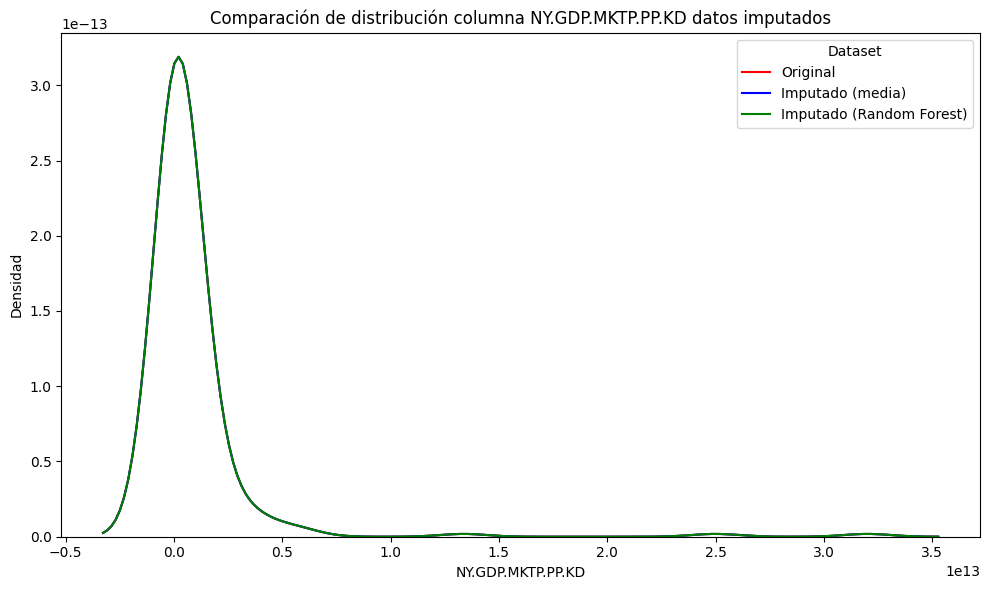

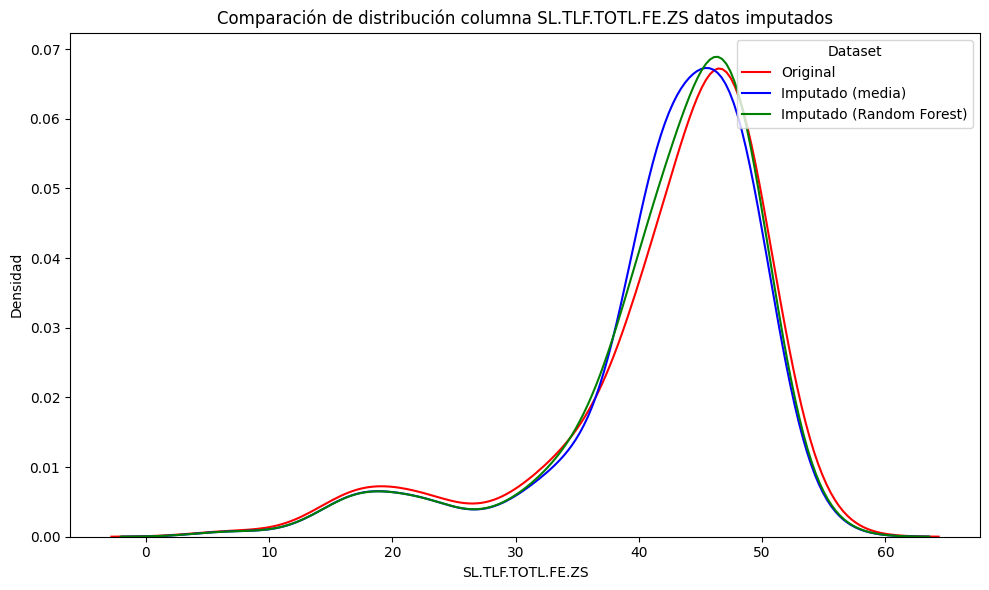

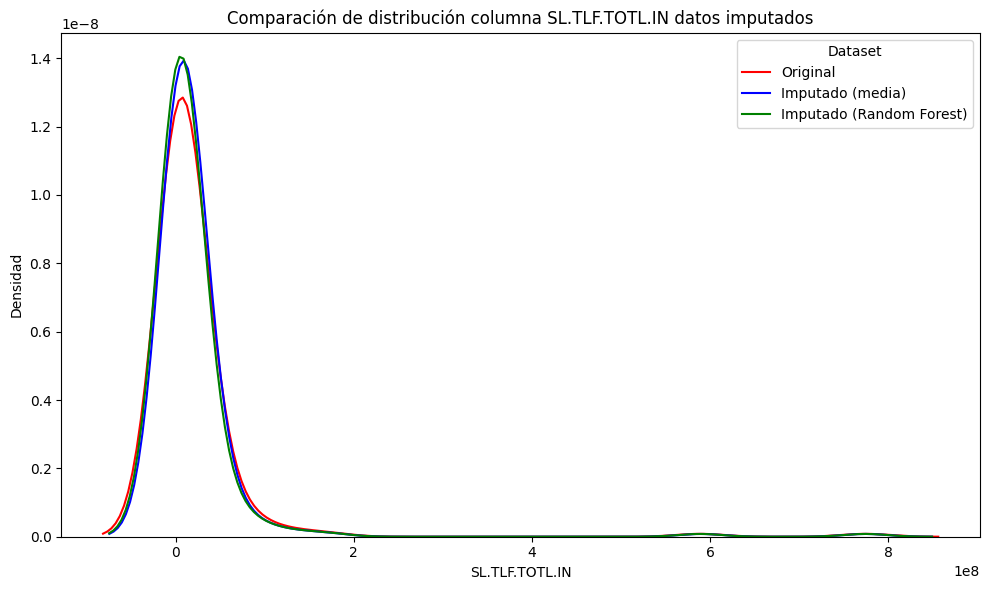

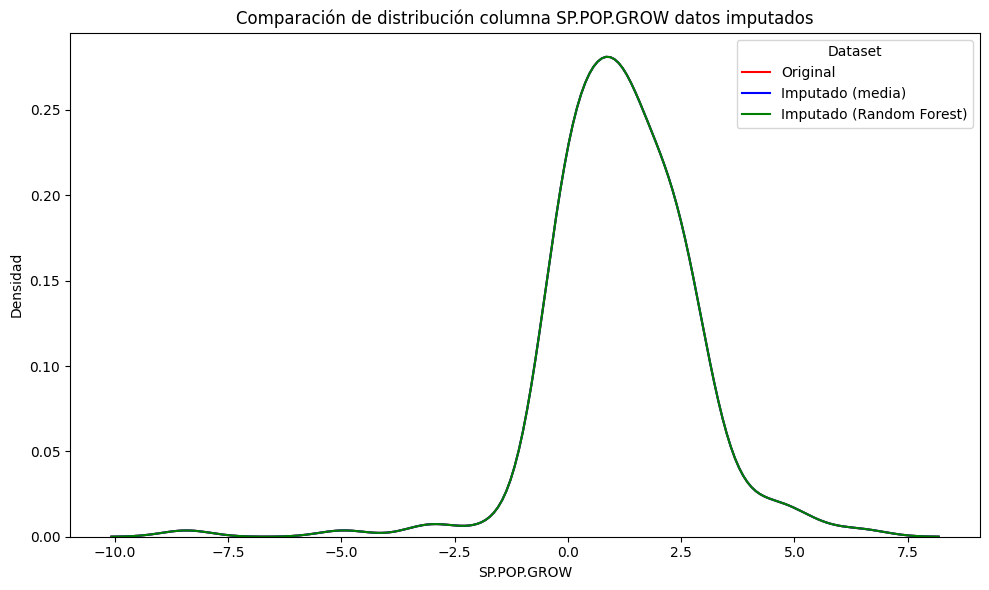

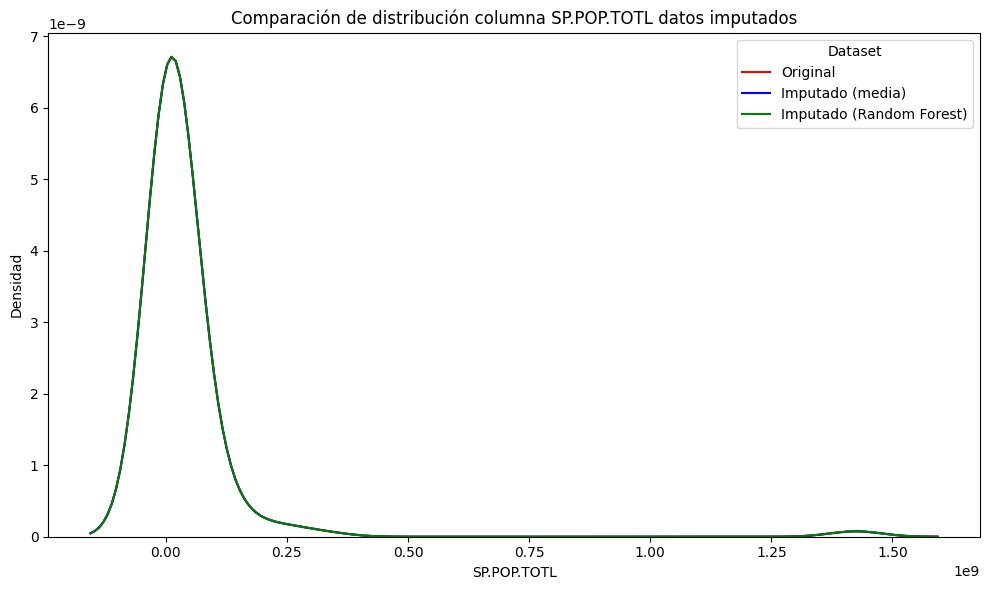

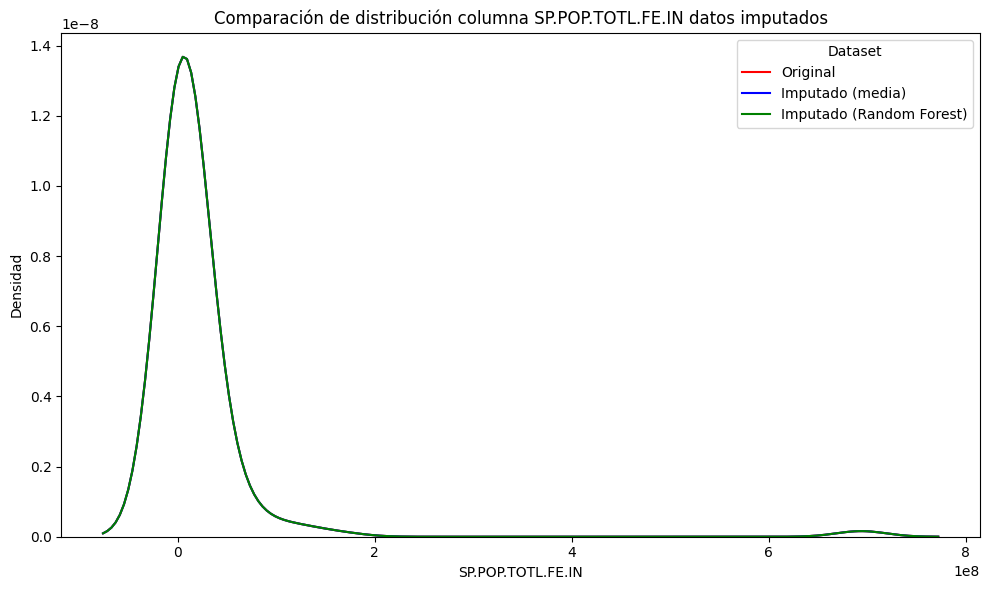

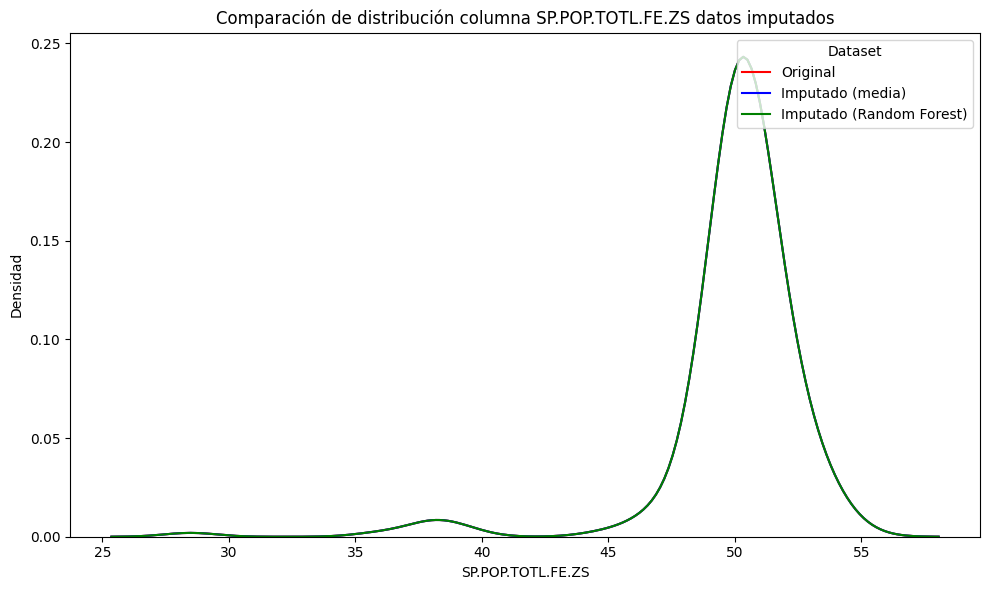

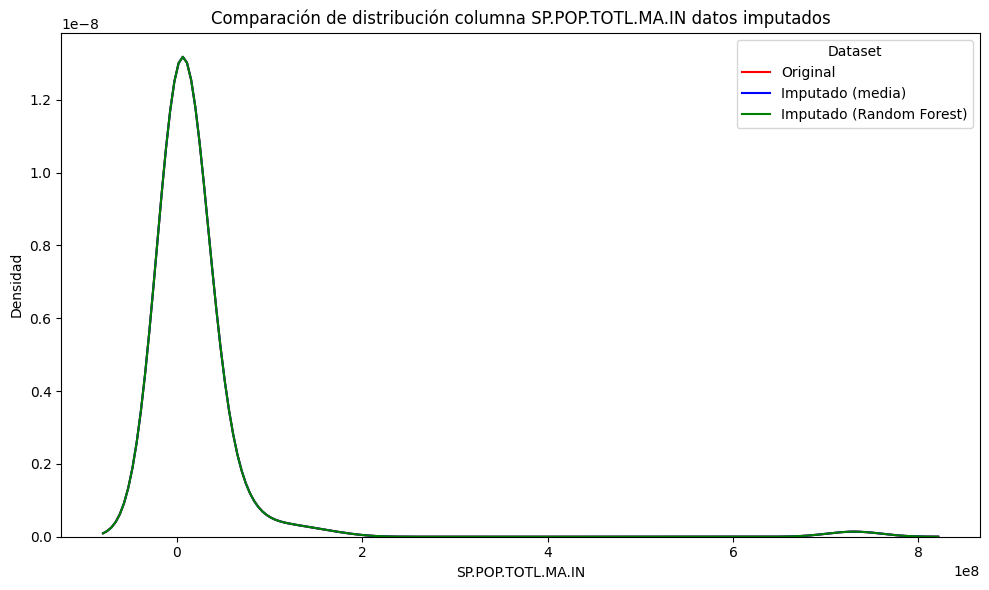

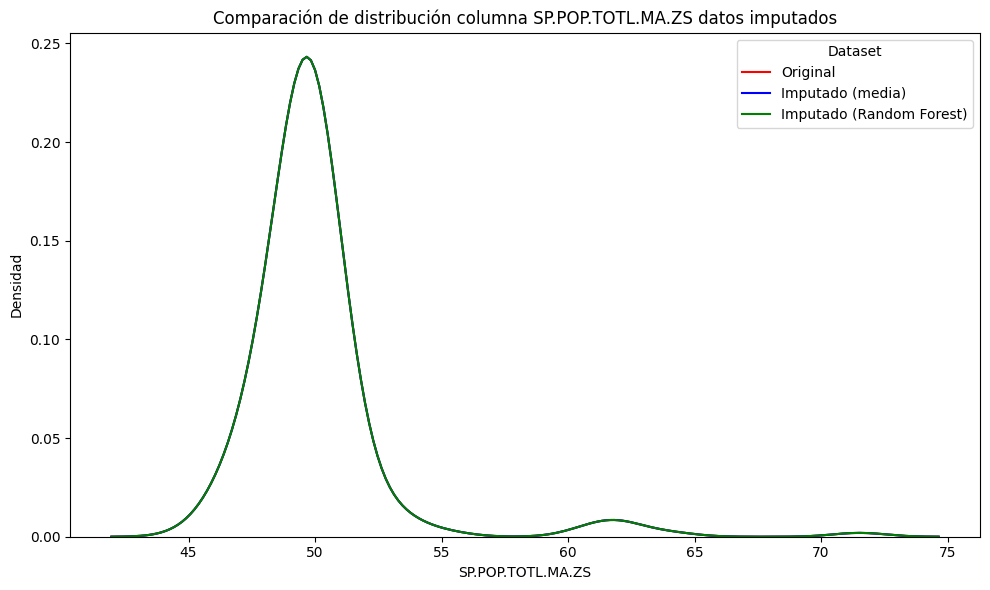

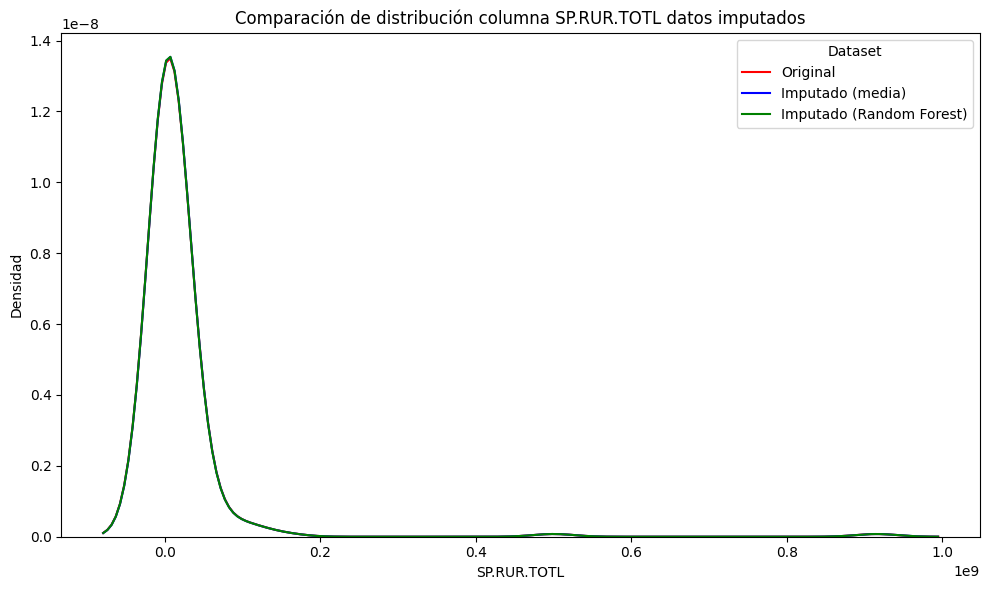

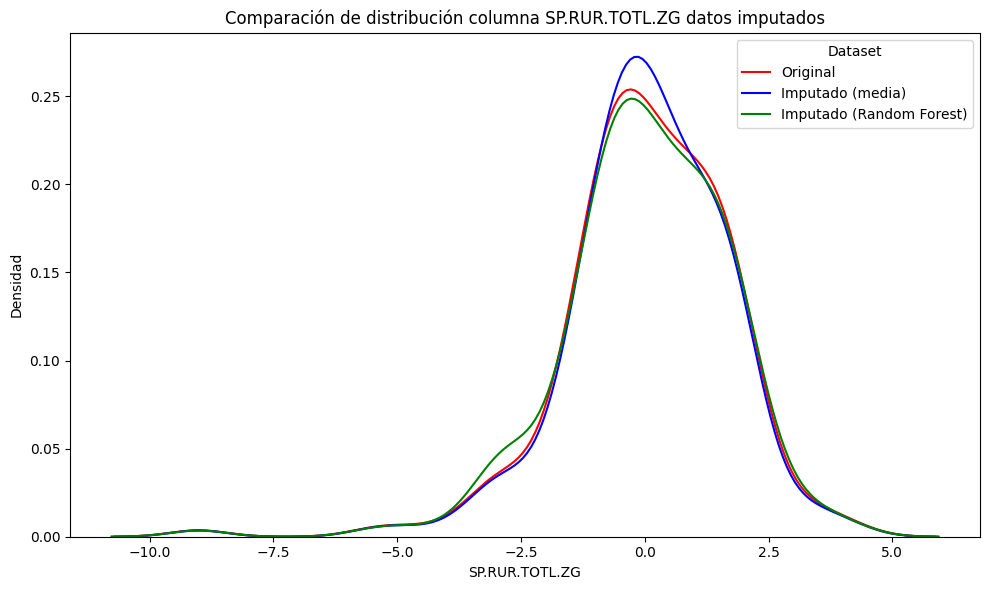

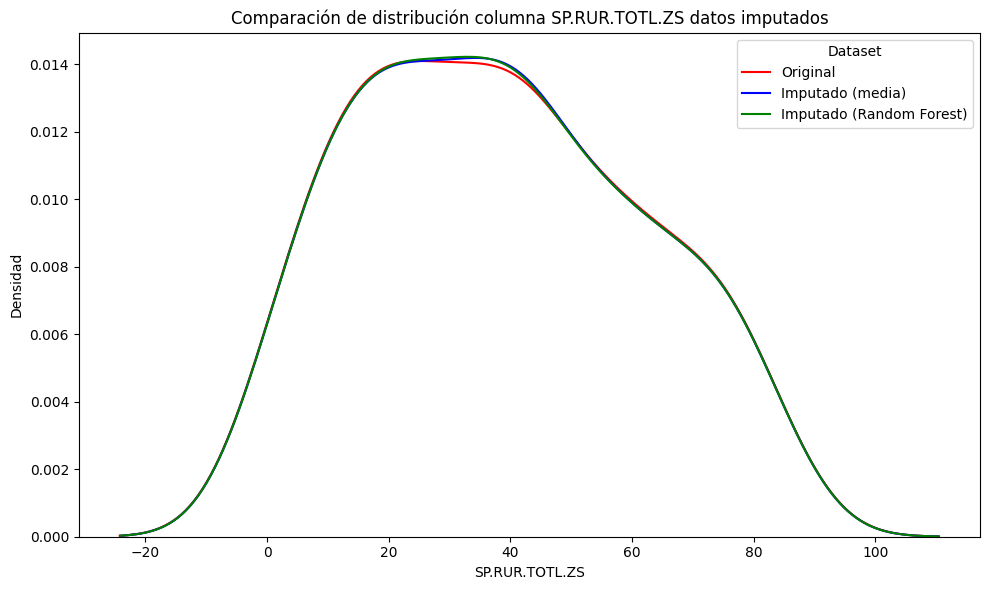

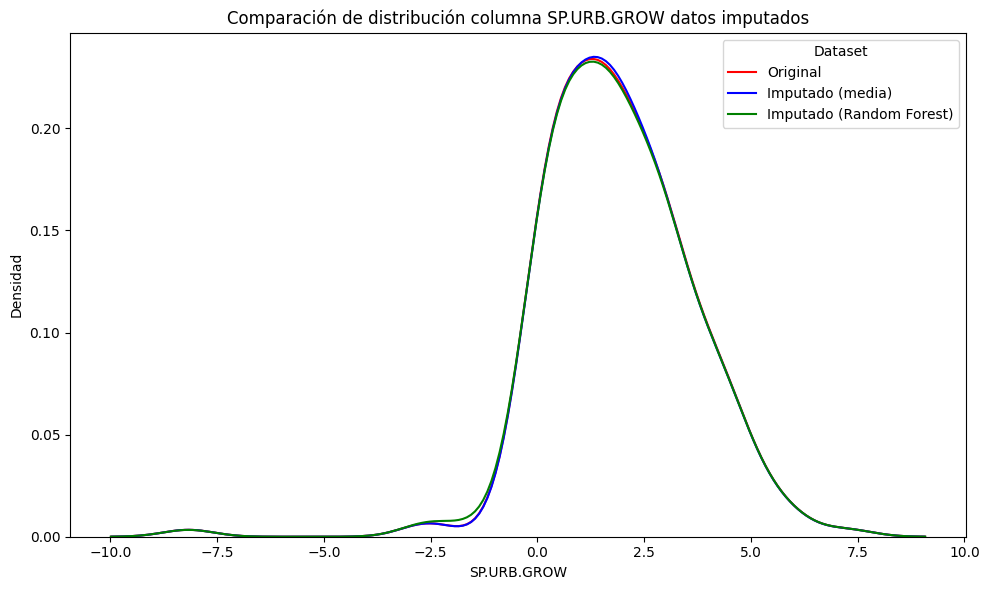

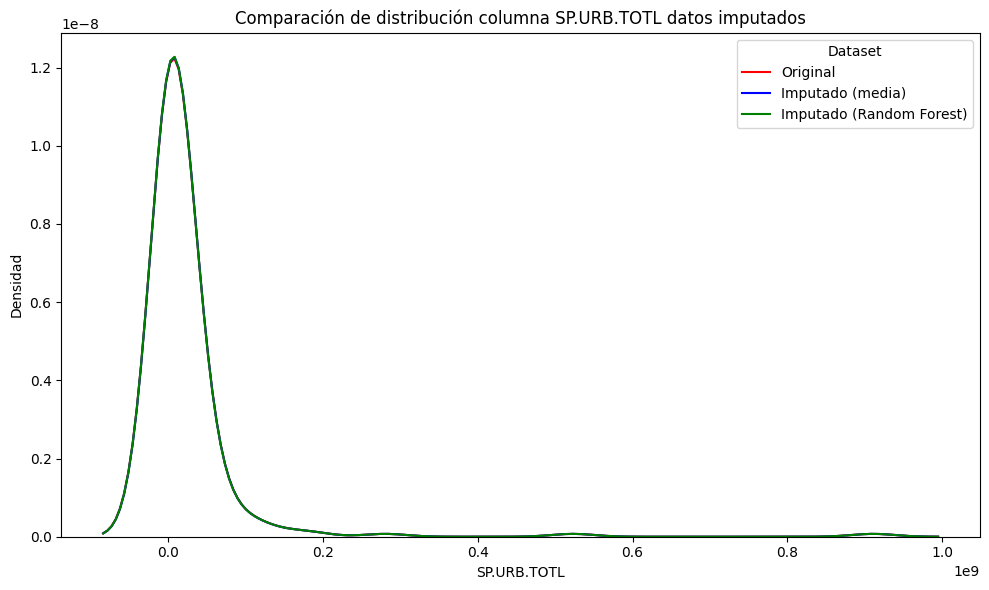

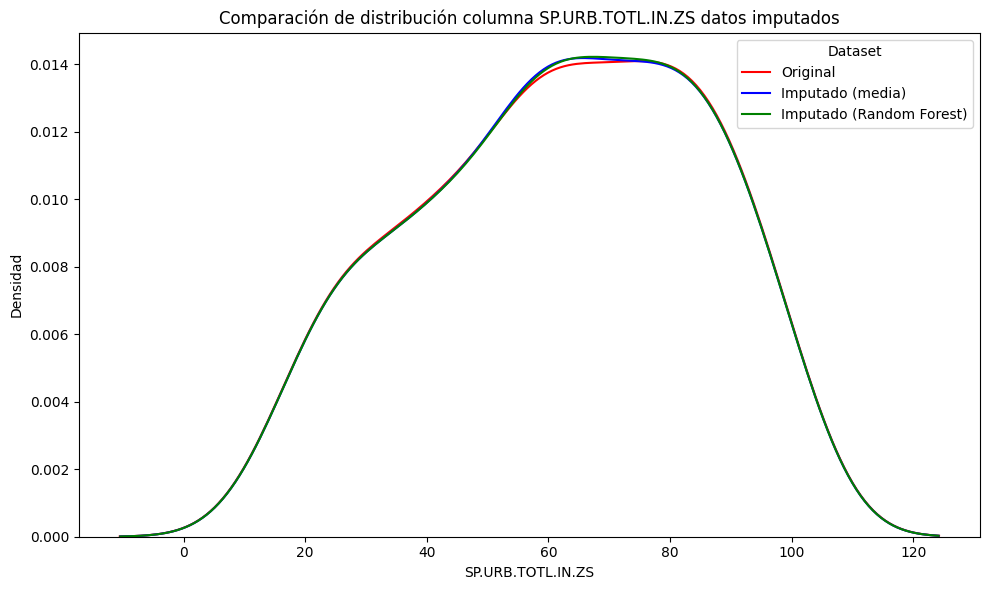

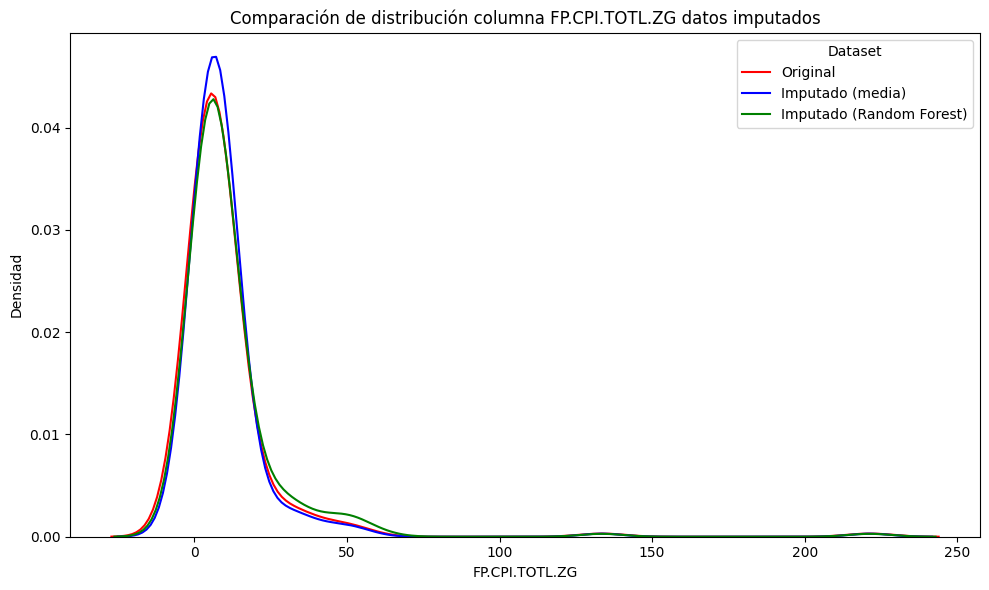

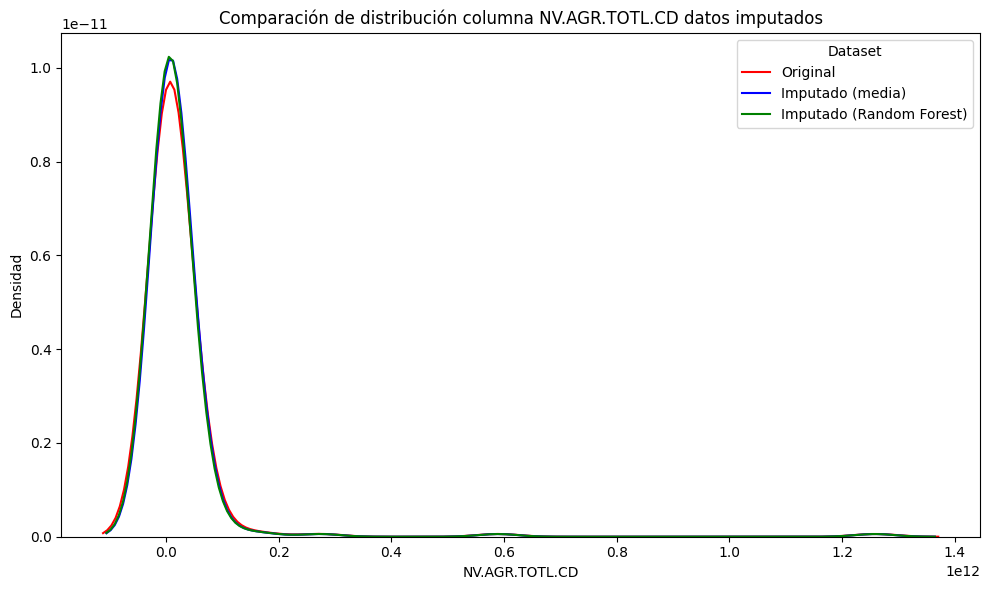

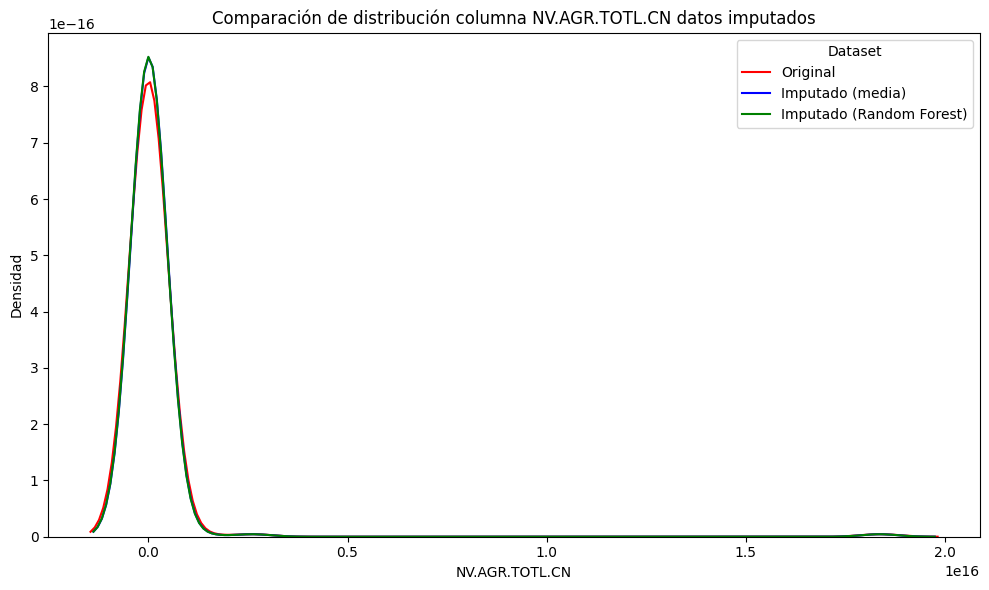

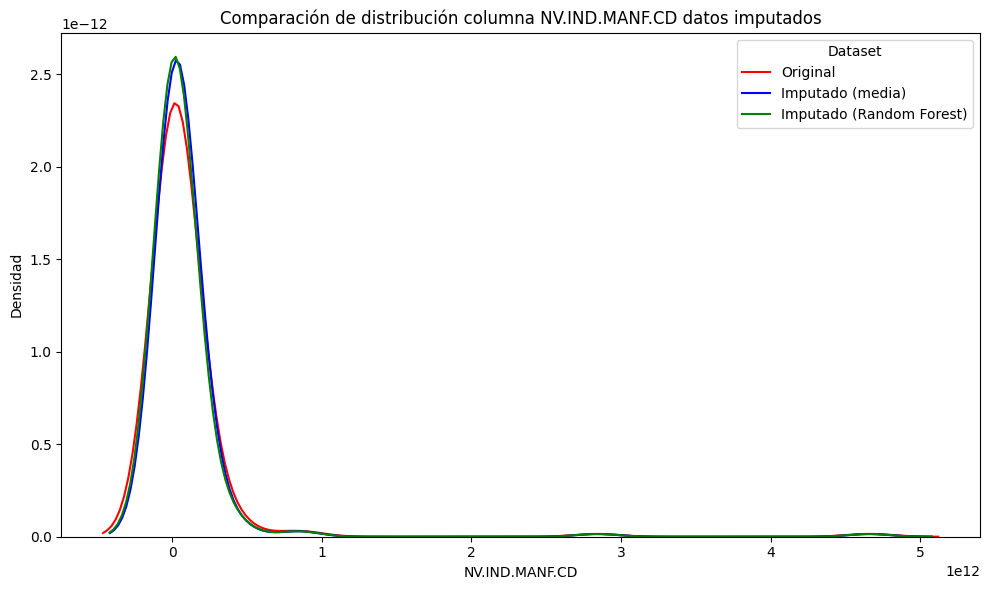

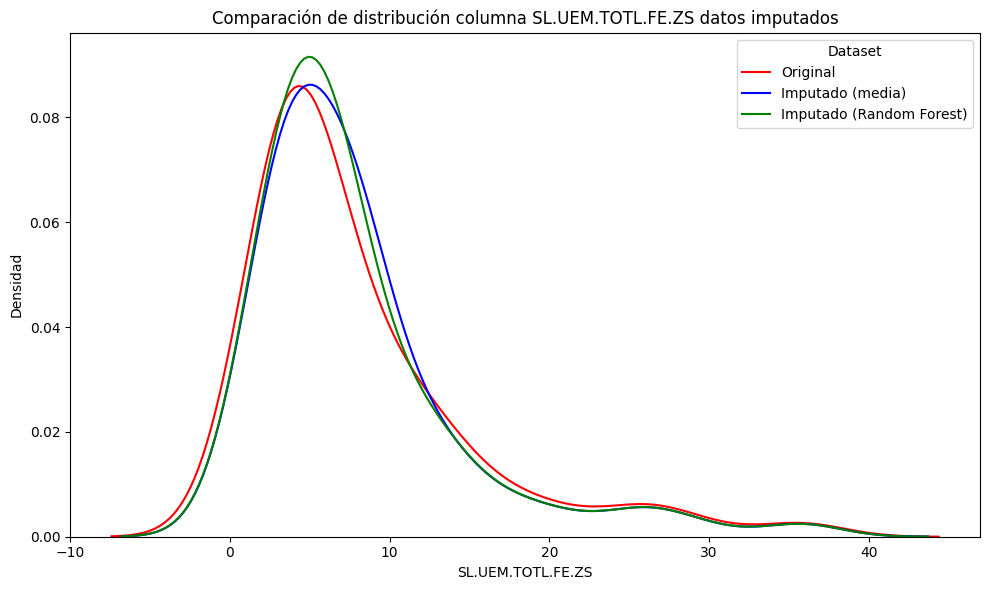

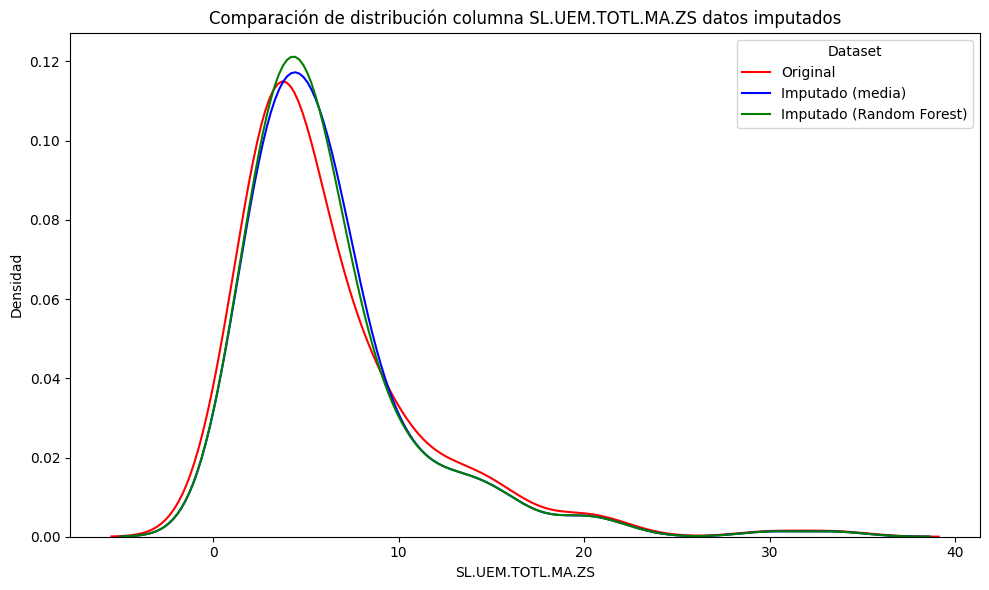

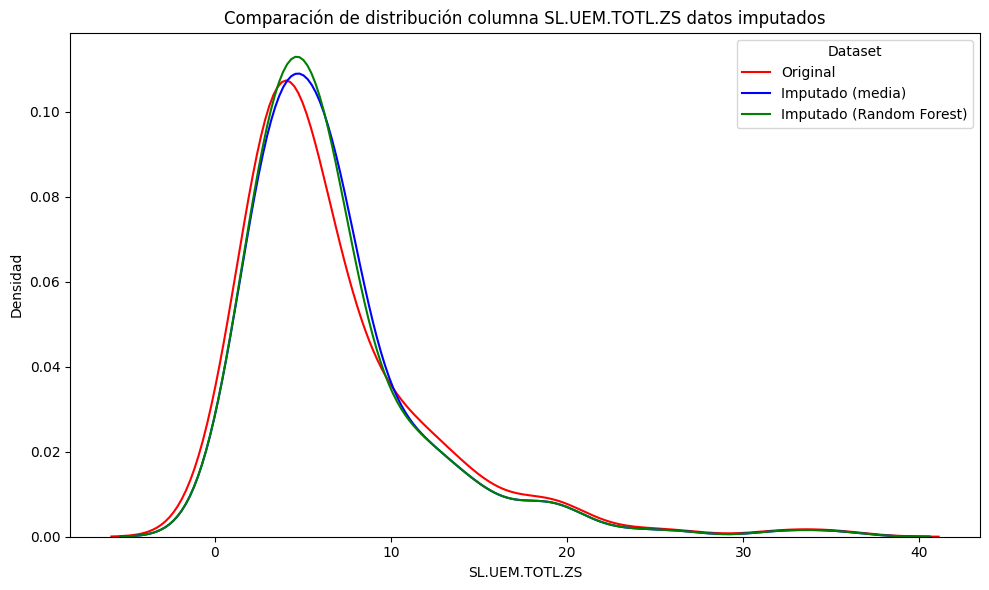

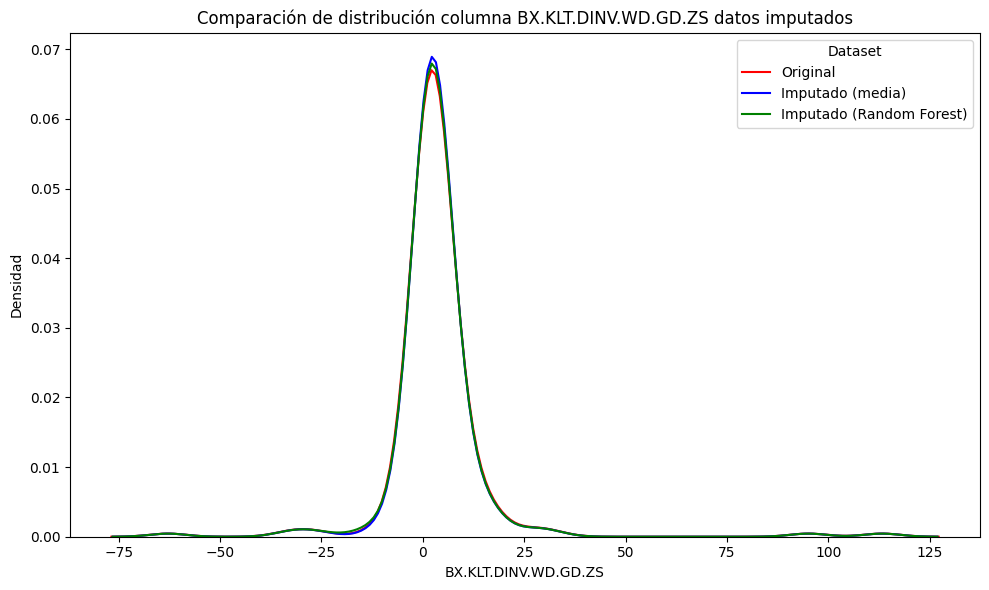

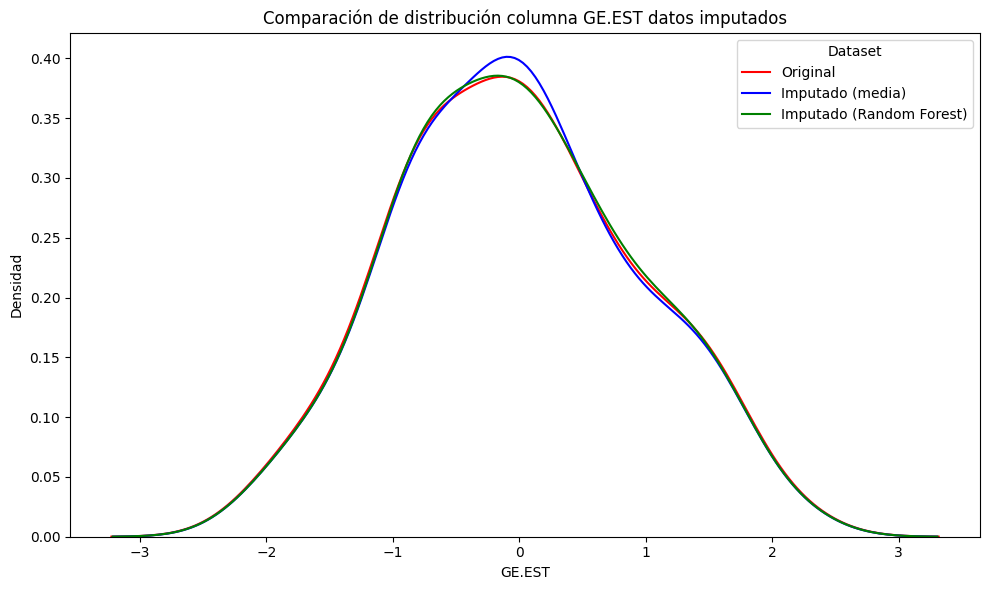

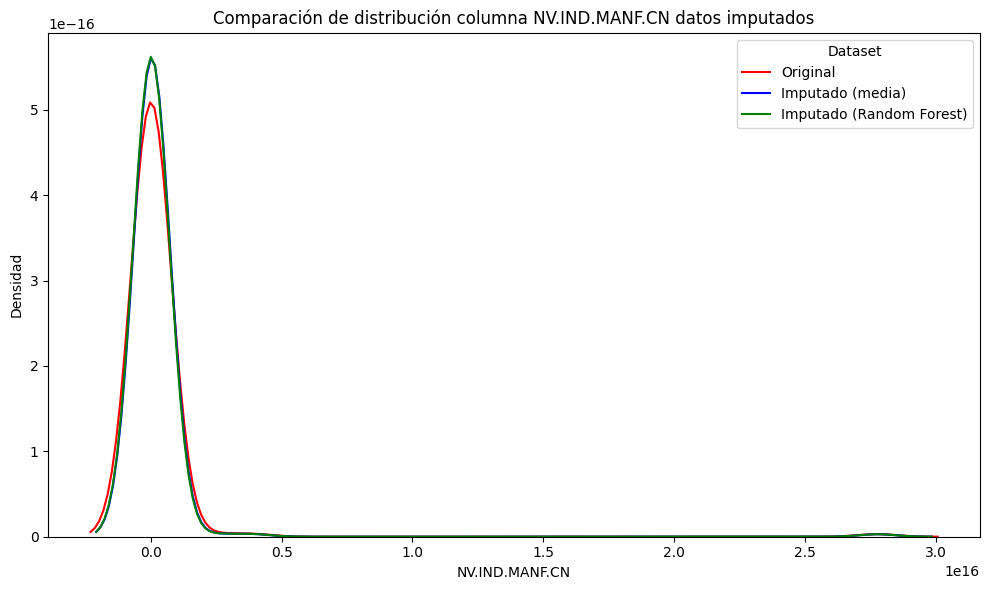

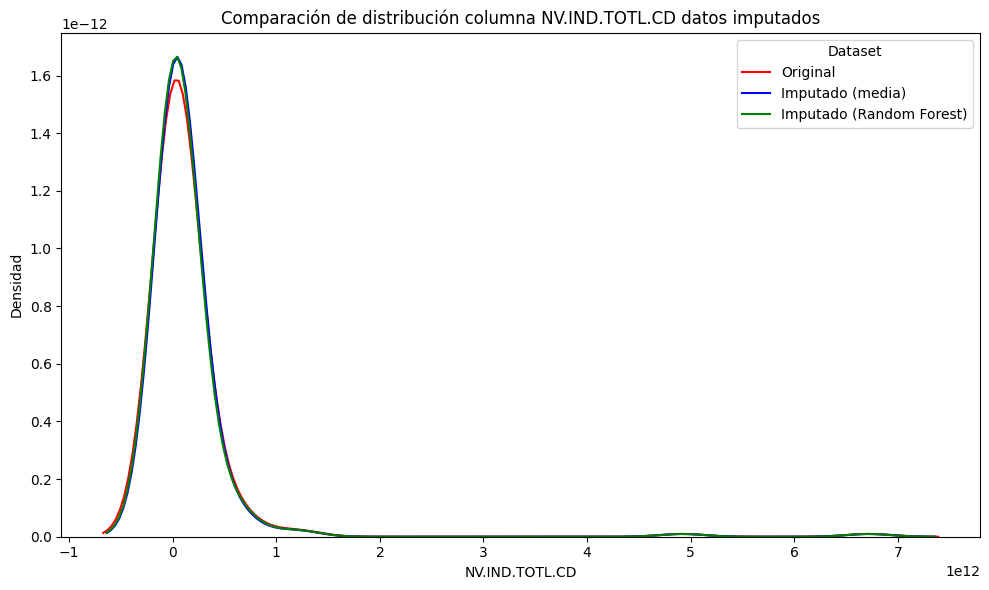

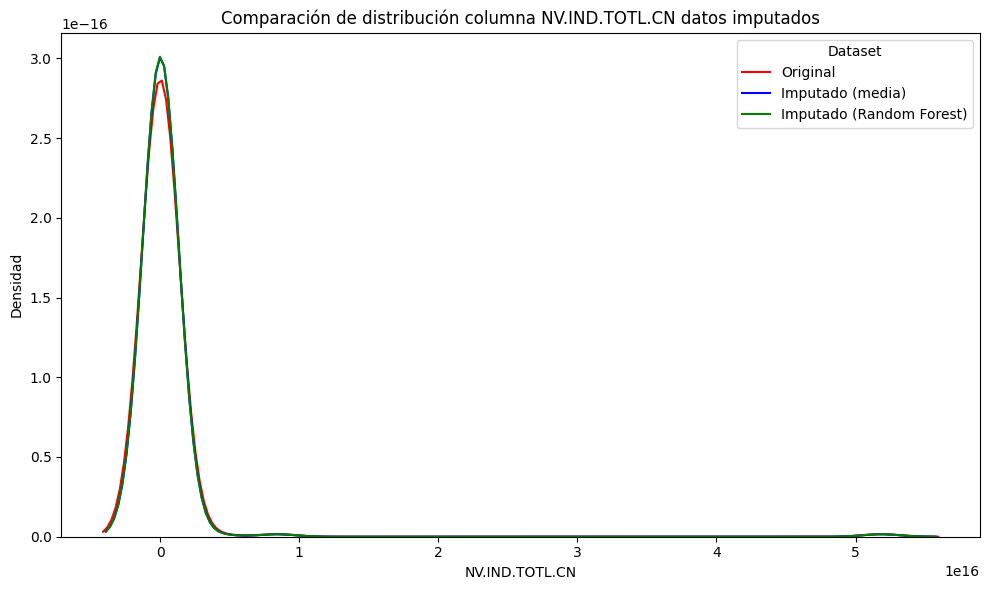

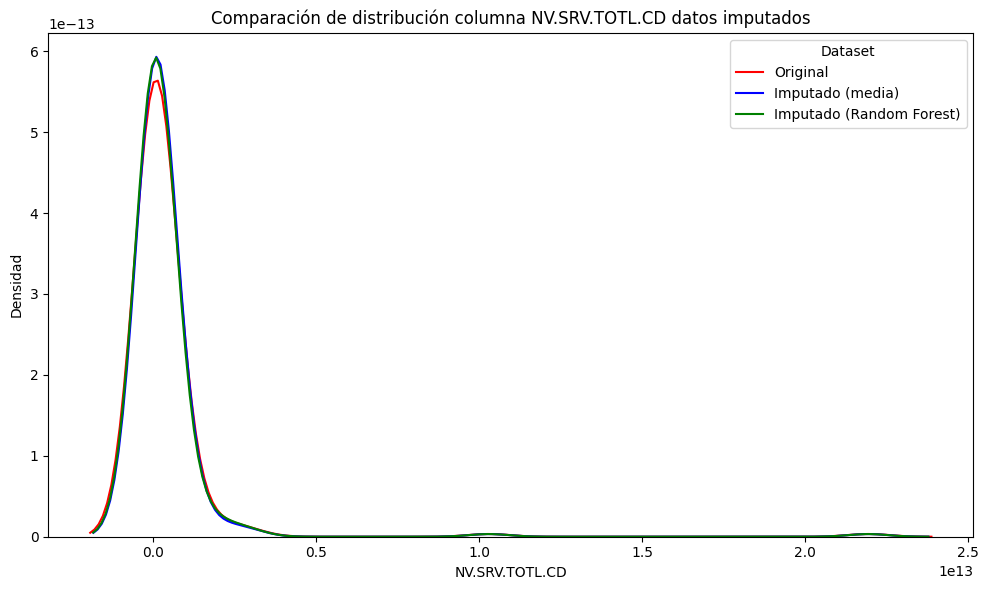

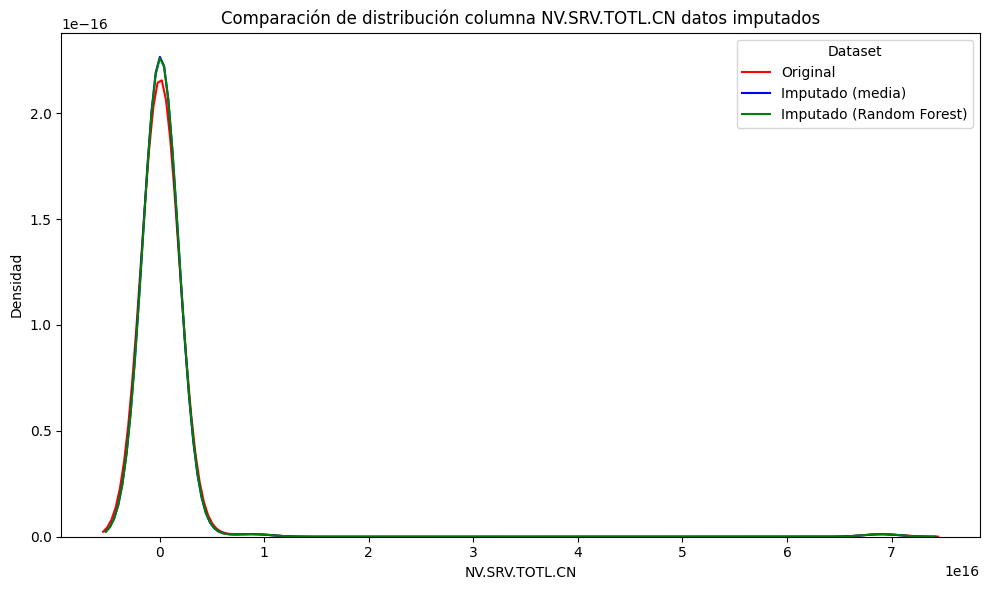

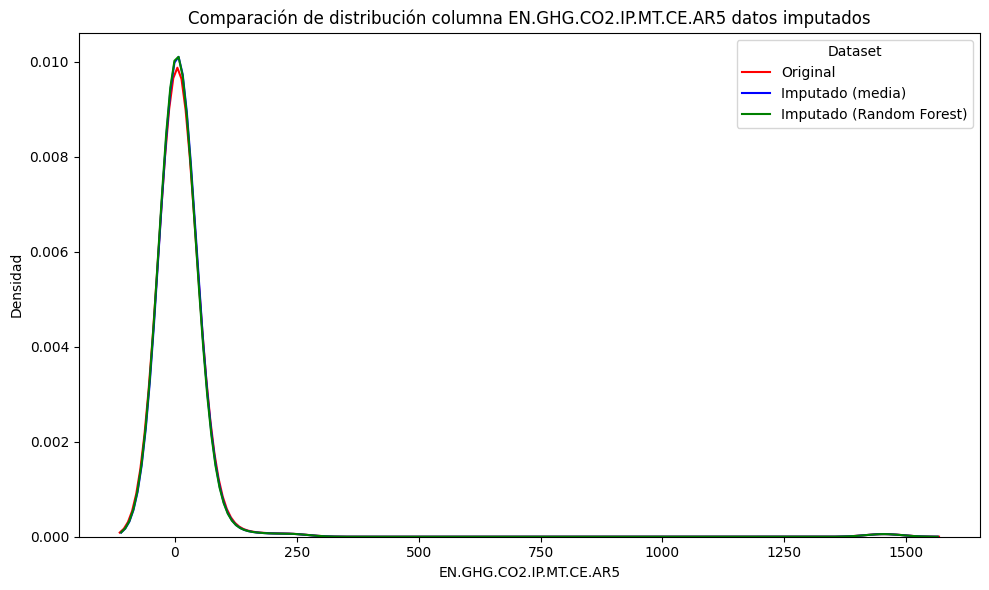

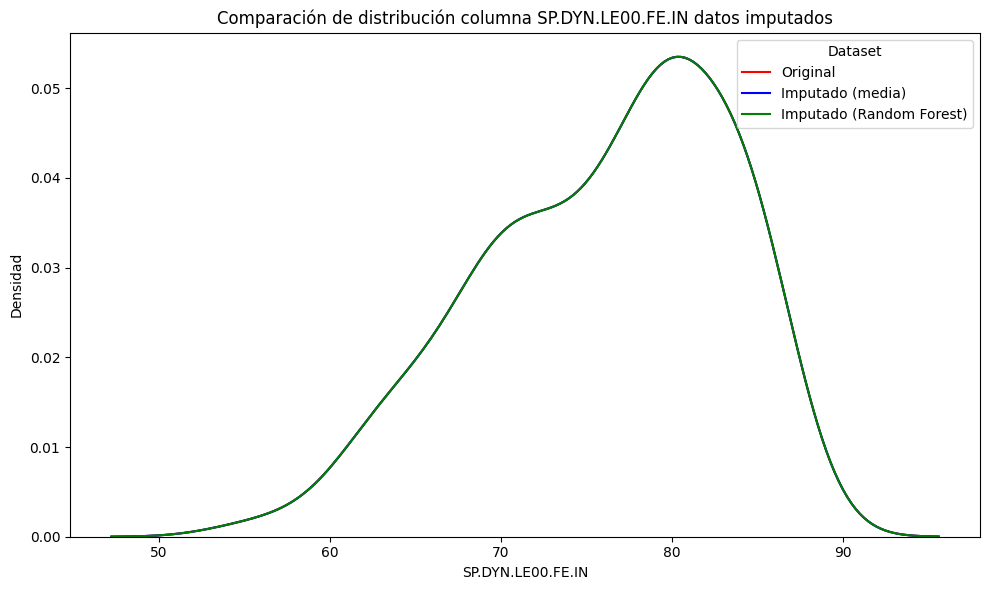

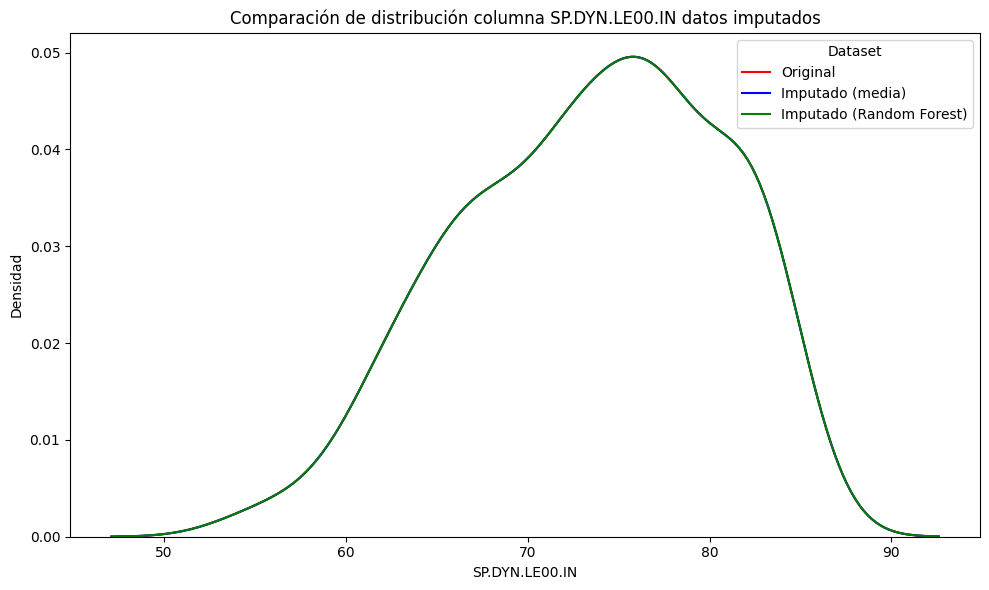

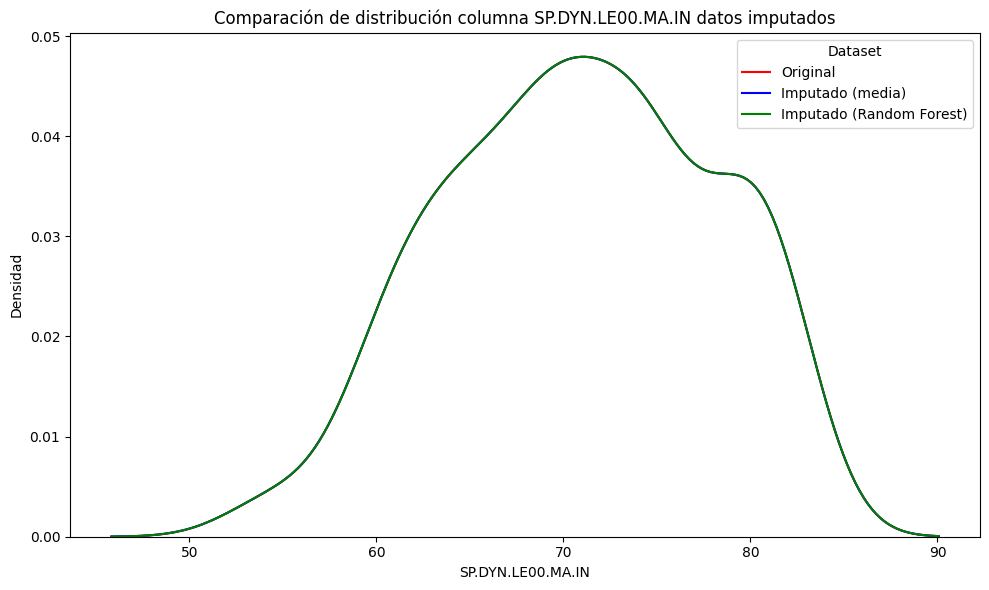

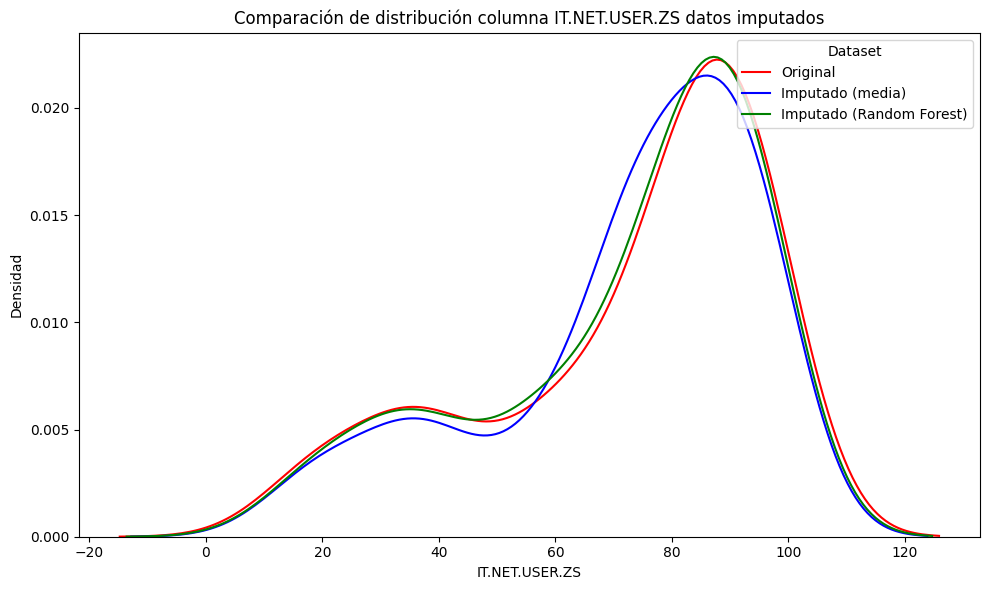

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas = df_wb_limpio.select_dtypes(include='number').columns

for col in columnas:
  plt.figure(figsize=(10, 6))
  sns.kdeplot(data=df_wb_limpio, x= col, label='Original', color='red')
  sns.kdeplot(data=df_wb_media, x=col, label='Imputado (media)', color='blue')
  sns.kdeplot(data=df_randomf, x=col, label='Imputado (Random Forest)', color='green')

  plt.legend(title='Dataset', loc='upper right')
  plt.title(f"Comparación de distribución columna {col} datos imputados")
  plt.xlabel(col)
  plt.ylabel("Densidad")
  plt.tight_layout()
  plt.show()

Nos quedamos con el modelo random forest ya que es el que mas se aproxima a la vase de datos original

In [25]:
df_randomf.describe()

,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,...,NV.IND.MANF.CN,NV.IND.TOTL.CD,NV.IND.TOTL.CN,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,IT.NET.USER.ZS
count,1.970000e+02,197.000000,1.970000e+02,197.000000,1.970000e+02,1.970000e+02,197.000000,1.970000e+02,197.000000,1.970000e+02,...,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,197.000000,197.000000,197.000000,197.000000,197.000000
mean,8.378243e+11,42.001917,1.844197e+07,1.188165,4.020363e+07,1.998092e+07,49.969112,2.022271e+07,50.030888,1.721639e+07,...,1.943895e+14,1.416820e+11,3.561558e+14,3.497304e+11,4.919870e+14,16.259688,76.063563,73.413980,70.842863,72.028688
std,3.135867e+12,8.534187,7.183746e+07,1.587514,1.488468e+08,7.269947e+07,3.000380,7.616069e+07,3.000380,7.611157e+07,...,2.002292e+15,6.125967e+11,3.745780e+15,1.766602e+12,4.962900e+15,105.952621,7.197387,7.049386,7.058500,23.690235
min,5.705451e+07,6.846247,3.361400e+04,-8.423008,9.816000e+03,4.795000e+03,28.483741,5.021000e+03,45.079120,0.000000e+00,...,2.264200e+06,1.915393e+07,2.233180e+07,1.827269e+08,1.827269e+08,0.000000,54.743000,54.462000,53.195000,11.078400
25%,2.574991e+10,39.983237,7.554140e+05,0.286976,1.384286e+06,6.912040e+05,49.649835,6.977740e+05,48.805591,4.136890e+05,...,1.047769e+10,2.510359e+09,2.952008e+10,6.193772e+09,5.606331e+10,0.124500,70.726000,67.689000,65.341000,58.231400
50%,8.598390e+10,44.581900,3.189737e+06,1.138185,7.364438e+06,3.753089e+06,50.326894,3.611349e+06,49.673106,1.905071e+06,...,1.631920e+11,1.172474e+10,3.593760e+11,2.182338e+10,9.738043e+11,1.253700,77.418000,74.183780,70.532000,80.389600
75%,4.680949e+11,47.453718,1.084394e+07,2.195243,2.969461e+07,1.423210e+07,51.194409,1.427923e+07,50.350165,1.128400e+07,...,4.436468e+12,8.491078e+10,7.457044e+12,1.475324e+11,1.517215e+13,5.199900,81.700000,78.473171,75.800000,89.805200
max,3.200488e+13,54.670843,7.746076e+08,6.527050,1.438070e+09,6.961863e+08,54.920880,7.418833e+08,71.516259,9.151300e+08,...,2.776583e+16,6.718467e+12,5.184296e+16,2.193786e+13,6.903949e+16,1454.067000,88.090000,85.247317,82.700000,100.000000


##Outliers metodo ABOD

In [26]:
%pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 8.0 MB/s eta 0:00:00


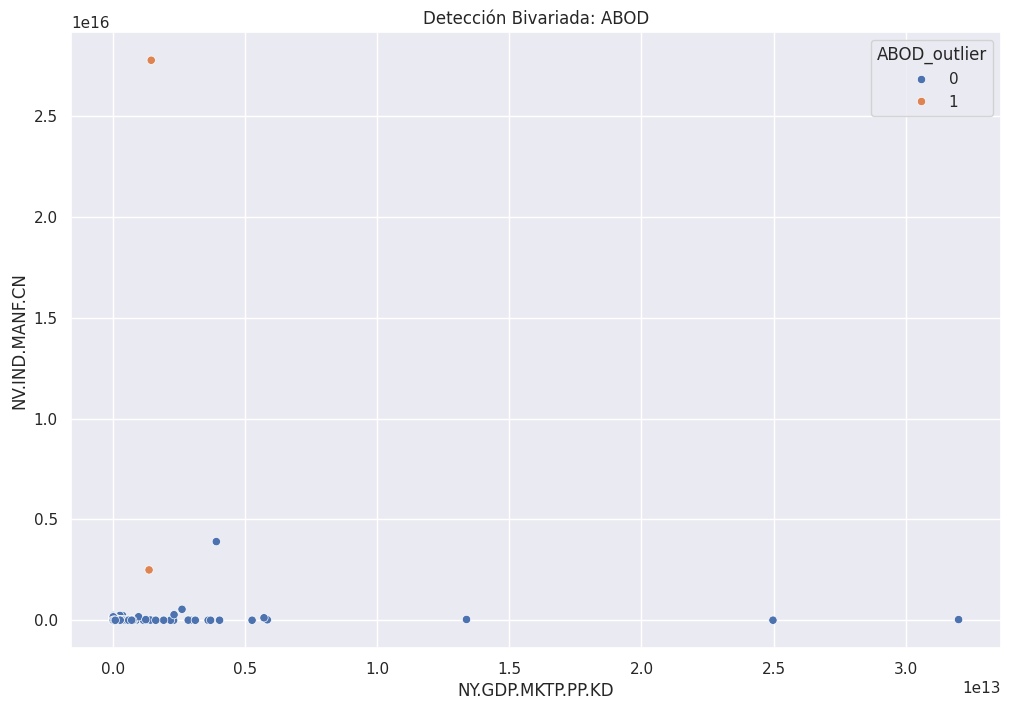

In [27]:
from pyod.models.abod import ABOD

abod_clf = ABOD(contamination=0.01)

df_a = df_randomf.copy()

numeric_cols = df_a.select_dtypes(include=np.number).columns
abod_clf.fit(df_a[numeric_cols])

df_a['ABOD_outlier'] = abod_clf.labels_

sns.set(rc = {'figure.figsize':(12,8)})
sns.scatterplot(data=df_a, x='NY.GDP.MKTP.PP.KD', y='NV.IND.MANF.CN', hue='ABOD_outlier')
plt.title('Detección Bivariada: ABOD')
plt.show()

In [28]:
df_a['ABOD_outlier'].sum()

np.int64(2)

##Escalar datos

In [29]:
y = df_randomf['NY.GDP.MKTP.PP.KD']
x = df_randomf.drop(columns='NY.GDP.MKTP.PP.KD')

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std, columns=x.columns)

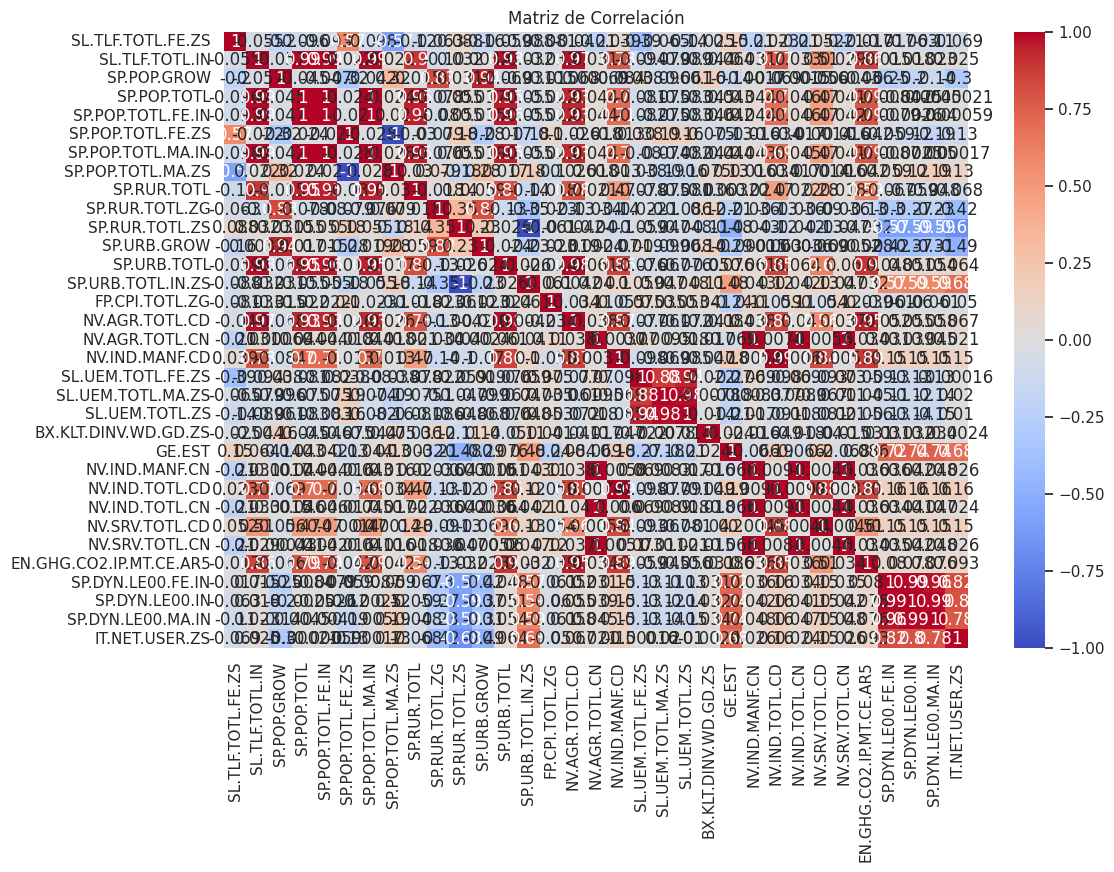

In [32]:
import matplotlib.pyplot as plt

corr = x_std.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_std)

pca.explained_variance_ratio_

array([2.80024547e-01, 1.79124255e-01, 1.25457881e-01, 1.01998587e-01,
       8.51166643e-02, 5.07750466e-02, 3.95025322e-02, 3.57725680e-02,
       2.81091660e-02, 2.53547741e-02, 1.45091010e-02, 1.28531841e-02,
       7.45931760e-03, 6.04003502e-03, 3.53509572e-03, 1.59279963e-03,
       7.63229027e-04, 7.28386165e-04, 6.07549090e-04, 3.38132755e-04,
       1.21802554e-04, 9.26779778e-05, 5.57763607e-05, 3.24014262e-05,
       1.34947573e-05, 1.14272579e-05, 4.53500494e-06, 2.69316974e-06,
       2.32402557e-06, 1.64738928e-08, 8.31732946e-31, 1.22787488e-33,
       1.03313958e-33])

In [34]:
np.sum(pca.explained_variance_ratio_[:5])

np.float64(0.7717219340321275)

In [35]:
# Seleccionar 2 componentes
pca_2 = PCA(n_components=5)
data_pca = pca_2.fit_transform(x_std)

df_pca = pd.DataFrame(data_pca, columns=['CP1', 'CP2','CP3','CP4','CP5'])
df_pca.head()

,CP1,CP2,CP3,CP4,CP5
0,-1.207656,-3.686595,-0.250314,-1.113546,-0.601883
1,-0.984385,-2.915804,-0.188374,0.806576,-0.339004
2,-0.958360,-1.228970,-0.008549,0.295671,0.203207
3,1.151435,-0.336213,1.226377,0.343293,-2.407670
4,-1.063955,-2.148736,-0.049976,1.049440,-0.830563


In [36]:
# Matriz de correlación de las componentes
df_pca.corr()

,CP1,CP2,CP3,CP4,CP5
CP1,1.000000e+00,-3.904135e-17,5.685486e-17,-1.914891e-17,9.867101e-17
CP2,-3.904135e-17,1.000000e+00,-2.515376e-16,4.775816e-17,-1.615431e-16
CP3,5.685486e-17,-2.515376e-16,1.000000e+00,4.772844e-16,-5.037195e-16
CP4,-1.914891e-17,4.775816e-17,4.772844e-16,1.000000e+00,1.440616e-16
CP5,9.867101e-17,-1.615431e-16,-5.037195e-16,1.440616e-16,1.000000e+00
